In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os; os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
from tensorflow import keras

1/1 [==============================] - 0s 142ms/step


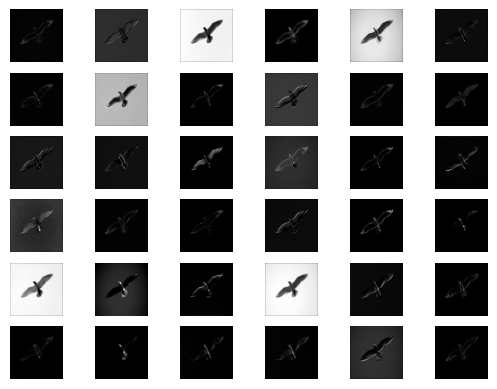

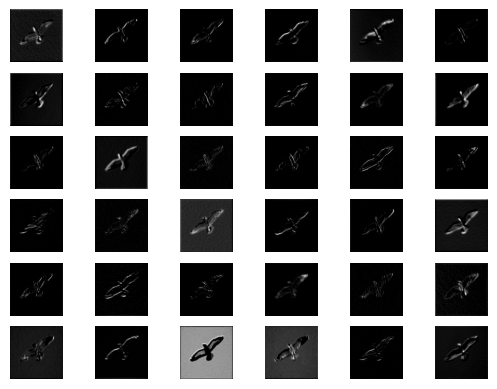

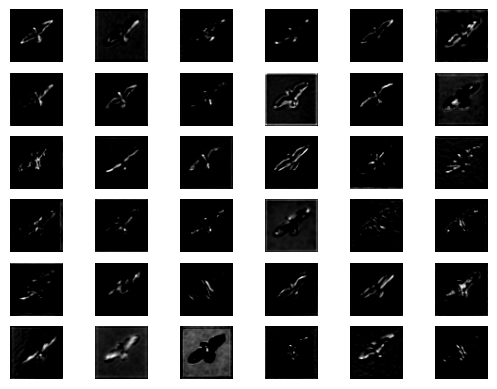

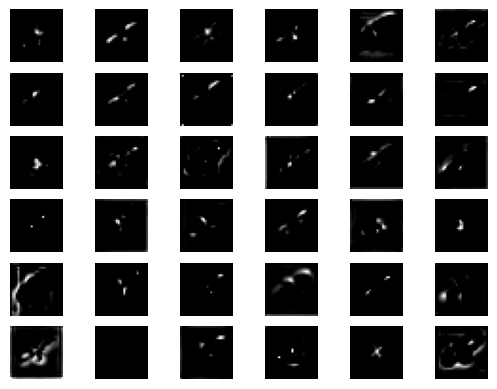

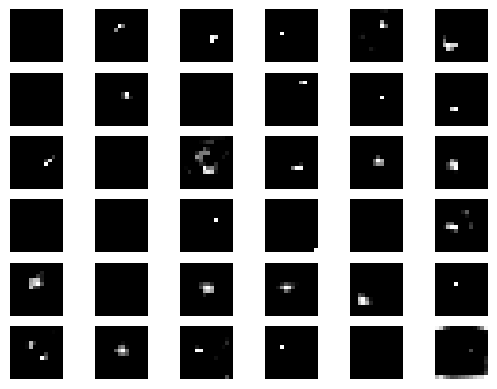

In [2]:
model = keras.applications.VGG16()
outputs = [model.layers[i].output for i in [2, 5, 9, 13, 17]]
model = keras.Model(inputs=model.inputs, outputs=outputs)
img = keras.utils.load_img('data/bird.jpg', target_size=(224, 224))
img = keras.utils.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = keras.applications.vgg16.preprocess_input(img)
feature_maps = model.predict(img)
for feature_map in feature_maps:
    fig = plt.figure()
    for i in range(36):
        ax = plt.subplot(6, 6, i+1)
        plt.imshow(feature_map[0, :, :, i], cmap='gray')
        plt.axis('off')
    plt.show()